In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/Akhilesh/Downloads/uber.csv")

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


## Preprocessing data

In [5]:
df.drop(["Unnamed: 0", "key", "pickup_datetime"],axis=1, inplace=True);

In [6]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Identify outliers

<Axes: ylabel='fare_amount'>

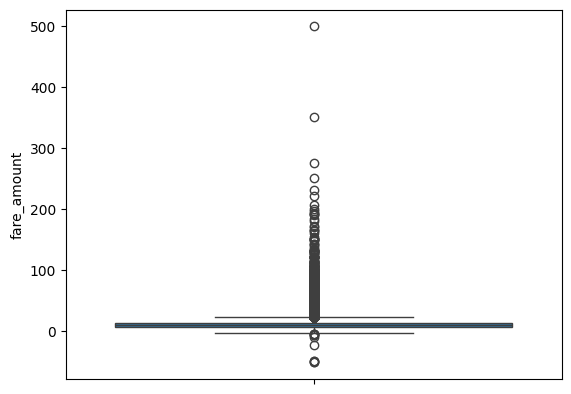

In [10]:
sns.boxplot(df['fare_amount'])

<Axes: ylabel='fare_amount'>

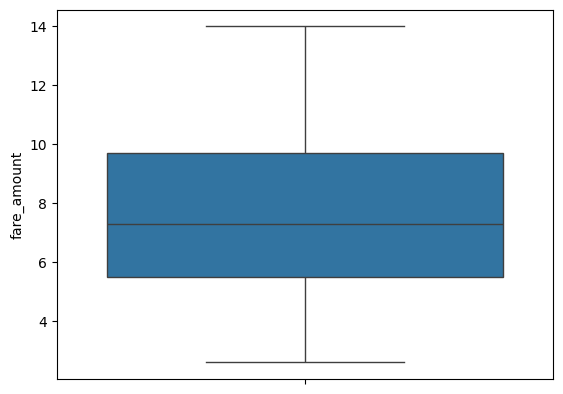

In [11]:
low = df['fare_amount'].quantile(0.001)
high = df['fare_amount'].quantile(0.8)
df=df[(df['fare_amount']>low) & (df['fare_amount']<high)]
sns.boxplot(df['fare_amount'])

## Check the correlation. 

<Axes: >

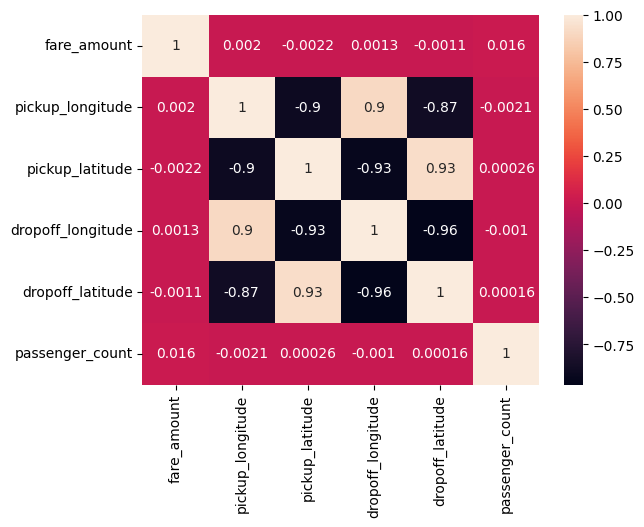

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True)

## Implement linear regression and random forest regression models. 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [14]:
x = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [15]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred_LR = LR.predict(x_test)
y_pred_LR

array([7.72300968, 7.72290339, 7.72300562, ..., 7.75470721, 7.72304692,
       7.72295508])

In [25]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [26]:
y_pred_RF = RF.predict(x_test)
y_pred_RF

array([9.334, 6.517, 6.754, ..., 9.921, 9.182, 5.779])

## Evaluate the models and compare their respective scores like R2, RMSE,

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
r2_LR = r2_score(y_test, y_pred_LR)
rms_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))
print("Linear Regression : R2 Score: ",r2_LR, "RMS Error: ", rms_LR)

Linear Regression : R2 Score:  3.5664566793380814e-05 RMS Error:  2.7050327041186484


In [34]:
r2_RF = r2_score(y_test, y_pred_RF)
rms_RF = np.sqrt(mean_squared_error(y_test, y_pred_RF))
print("Random Forest Regression : R2 Score: ",r2_RF, "RMS Error: ", rms_RF)

Random Forest Regression : R2 Score:  0.6361328765721789 RMS Error:  1.6317426812609686


In [35]:
if r2_RF > r2_LR:
    print("Random Forest Regression performs better with higher R2 score.")
else:
    print("Linear Regression performs better with higher R2 score.")

if rms_RF < rms_LR:
    print("Random Forest Regression has better performance with lower RMS Error.")
else:
    print("Linear Regression has better performance with lower RMS Error.")

Random Forest Regression performs better with higher R2 score.
Random Forest Regression has better performance with lower RMS Error.
